This is my second and third Capstones combined.

At first, I import all the necesary librairies for the project and also the data set I will use.

In [1]:
!pip install geopandas
!pip install geoplot

import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, gridplot
from bokeh.io import output_notebook, push_notebook
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from bokeh.palettes import cividis, TolRainbow
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import logging

output_notebook()
sklearn.set_config(display= 'diagram')
schools_columns = ['School Name', 'School Level' , 'School Language', 'City', 'Enrolment','Latitude','Longitude','Percentage of Students Whose First Language Is Not English','Percentage of Students Whose First Language Is Not French','Percentage of Students Who Are New to Canada from a Non-English Speaking Country','Percentage of Students Who Are New to Canada from a Non-French Speaking Country','Percentage of Students Receiving Special Education Services','Percentage of Students Identified as Gifted','Percentage of Grade 3 Students Achieving the Provincial Standard in Reading','Percentage of Grade 3 Students Achieving the Provincial Standard in Writing','Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics','Percentage of Grade 6 Students Achieving the Provincial Standard in Reading','Percentage of Grade 6 Students Achieving the Provincial Standard in Writing','Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics','Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics','Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics','Percentage of School-Aged Children Who Live in Low-Income Households','Percentage of Students Whose Parents Have No Degree, Diploma or Certificate']
schools_ontario = pd.read_excel('sif_data_table_2019_2020_en.xlsx', usecols = schools_columns)
schools_ontario.info()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 73.5 MB/s eta 0:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 23 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   School Name                                                                               4888 non-null   object 
 1   School Level                                                                              4888 non-null   object 
 2   School Language                                                                           4888 non-null   object 
 3   City                                                     

Cleaning and Preprocessing the DataFrame.


In [2]:
#functions to transform and deal with empty values in a column.
def transform_columns(dataframe, columnname):
  dataframe[columnname] = dataframe[columnname].replace('SP', 0)
  dataframe[columnname] = dataframe[columnname].replace('NA', 0)
  dataframe[columnname] = dataframe[columnname].replace(' NA', 0)
  dataframe[columnname] = dataframe[columnname].replace('N/D', 0)
  dataframe[columnname] = dataframe[columnname].replace('N/R', 0)
  return dataframe[columnname]

def change_to_numeric(dataframe, columnname):
  if dataframe[columnname].dtype == 'object':
    dataframe[columnname] = dataframe[columnname].str.replace('%','')
    dataframe[columnname] = pd.to_numeric(dataframe[columnname])
  else:
    dataframe[columnname] = pd.to_numeric(dataframe[columnname])
  dataframe[columnname] = dataframe[columnname].fillna(0)
  return dataframe[columnname]

#Apply transformation function to the numerical columns of the dataframe.
schools_ontario['Enrolment'] = transform_columns(schools_ontario, 'Enrolment')
schools_ontario['Enrolment'] = change_to_numeric(schools_ontario, 'Enrolment')
schools_ontario['Percentage of Students Whose First Language Is Not English'] = transform_columns(schools_ontario, 'Percentage of Students Whose First Language Is Not English')
schools_ontario['Percentage of Students Whose First Language Is Not English'] = change_to_numeric(schools_ontario, 'Percentage of Students Whose First Language Is Not English')
schools_ontario['Percentage of Students Whose First Language Is Not French'] = transform_columns(schools_ontario, 'Percentage of Students Whose First Language Is Not French')
schools_ontario['Percentage of Students Whose First Language Is Not French'] = change_to_numeric(schools_ontario, 'Percentage of Students Whose First Language Is Not French')
schools_ontario['Percentage of Students Who Are New to Canada from a Non-English Speaking Country'] = transform_columns(schools_ontario, 'Percentage of Students Who Are New to Canada from a Non-English Speaking Country')
schools_ontario['Percentage of Students Who Are New to Canada from a Non-English Speaking Country'] = change_to_numeric(schools_ontario, 'Percentage of Students Who Are New to Canada from a Non-English Speaking Country')
schools_ontario['Percentage of Students Who Are New to Canada from a Non-French Speaking Country'] = transform_columns(schools_ontario, 'Percentage of Students Who Are New to Canada from a Non-French Speaking Country')
schools_ontario['Percentage of Students Who Are New to Canada from a Non-French Speaking Country'] = change_to_numeric(schools_ontario, 'Percentage of Students Who Are New to Canada from a Non-French Speaking Country')
schools_ontario['Percentage of Students Receiving Special Education Services'] = transform_columns(schools_ontario, 'Percentage of Students Receiving Special Education Services')
schools_ontario['Percentage of Students Receiving Special Education Services'] = change_to_numeric(schools_ontario, 'Percentage of Students Receiving Special Education Services')
schools_ontario['Percentage of Students Identified as Gifted'] = transform_columns(schools_ontario, 'Percentage of Students Identified as Gifted')
schools_ontario['Percentage of Students Identified as Gifted'] = change_to_numeric(schools_ontario, 'Percentage of Students Identified as Gifted')
schools_ontario['Percentage of Grade 3 Students Achieving the Provincial Standard in Reading'] = transform_columns(schools_ontario, 'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading')
schools_ontario['Percentage of Grade 3 Students Achieving the Provincial Standard in Reading'] = change_to_numeric(schools_ontario, 'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading')
schools_ontario['Percentage of Grade 3 Students Achieving the Provincial Standard in Writing'] = transform_columns(schools_ontario, 'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing')
schools_ontario['Percentage of Grade 3 Students Achieving the Provincial Standard in Writing'] = change_to_numeric(schools_ontario, 'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing')
schools_ontario['Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics'] = transform_columns(schools_ontario, 'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics')
schools_ontario['Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics'] = change_to_numeric(schools_ontario, 'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics')
schools_ontario['Percentage of Grade 6 Students Achieving the Provincial Standard in Reading'] = transform_columns(schools_ontario, 'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading')
schools_ontario['Percentage of Grade 6 Students Achieving the Provincial Standard in Reading'] = change_to_numeric(schools_ontario, 'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading')
schools_ontario['Percentage of Grade 6 Students Achieving the Provincial Standard in Writing'] = transform_columns(schools_ontario, 'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing')
schools_ontario['Percentage of Grade 6 Students Achieving the Provincial Standard in Writing'] = change_to_numeric(schools_ontario, 'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing')
schools_ontario['Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics'] = transform_columns(schools_ontario, 'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics')
schools_ontario['Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics'] = change_to_numeric(schools_ontario, 'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics')
schools_ontario['Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics'] = transform_columns(schools_ontario, 'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics')
schools_ontario['Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics']  = change_to_numeric(schools_ontario, 'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics')
schools_ontario['Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics'] = transform_columns(schools_ontario, 'Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics')
schools_ontario['Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics'] = change_to_numeric(schools_ontario, 'Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics')
schools_ontario['Percentage of School-Aged Children Who Live in Low-Income Households'] = transform_columns(schools_ontario, 'Percentage of School-Aged Children Who Live in Low-Income Households')
schools_ontario['Percentage of School-Aged Children Who Live in Low-Income Households'] = change_to_numeric(schools_ontario, 'Percentage of School-Aged Children Who Live in Low-Income Households')
schools_ontario['Percentage of Students Whose Parents Have No Degree, Diploma or Certificate'] = transform_columns(schools_ontario, 'Percentage of Students Whose Parents Have No Degree, Diploma or Certificate')
schools_ontario['Percentage of Students Whose Parents Have No Degree, Diploma or Certificate'] = change_to_numeric(schools_ontario, 'Percentage of Students Whose Parents Have No Degree, Diploma or Certificate')

french_schools_ontario = schools_ontario.loc[schools_ontario['School Language'] == 'French']
english_schools_ontario = schools_ontario.loc[schools_ontario['School Language'] == 'English']

<ipython-input-2-2f4377cd0e29>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe[columnname] = dataframe[columnname].replace(' NA', 0)


Mapping the schools of the Ontario Province.


<ipython-input-3-3fec8c5eced6>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '#1965B0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  schools_ontario.loc[i,'hue'] = TolRainbow[8][1]
/usr/local/lib/python3.11/dist-packages/geoplot/geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/geoplot/geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/geoplot/geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


Text(0, 0.5, 'Latitude')

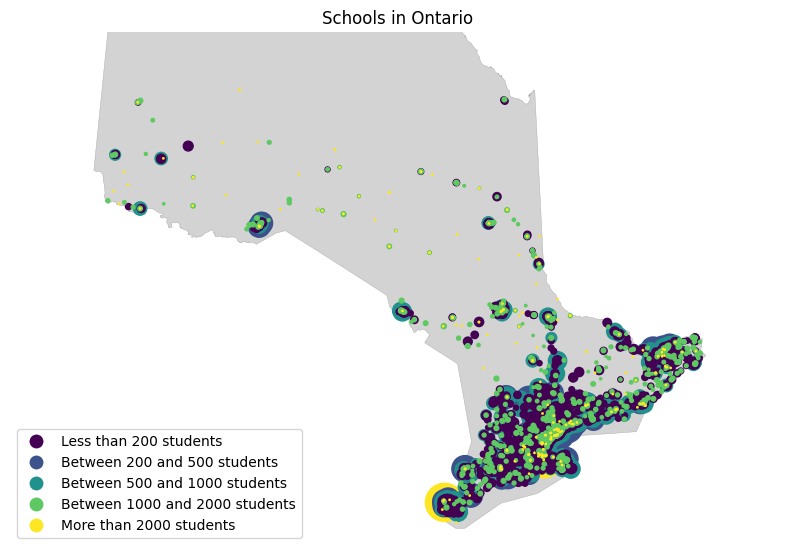

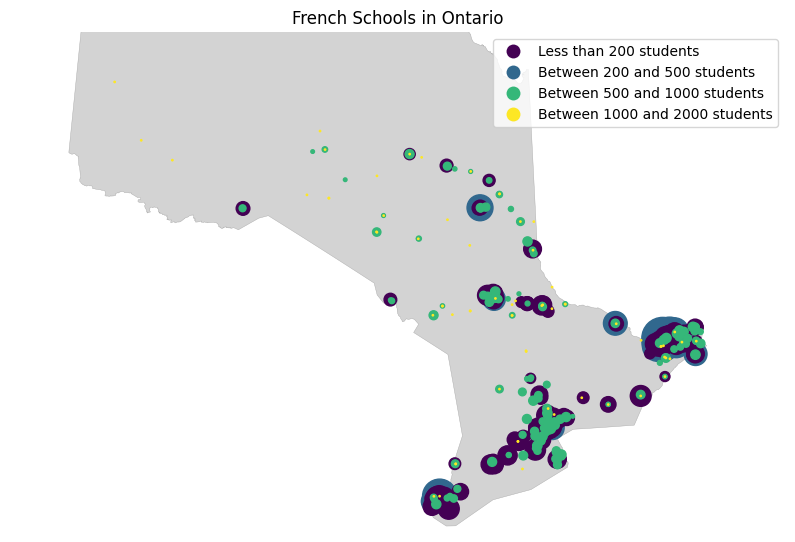

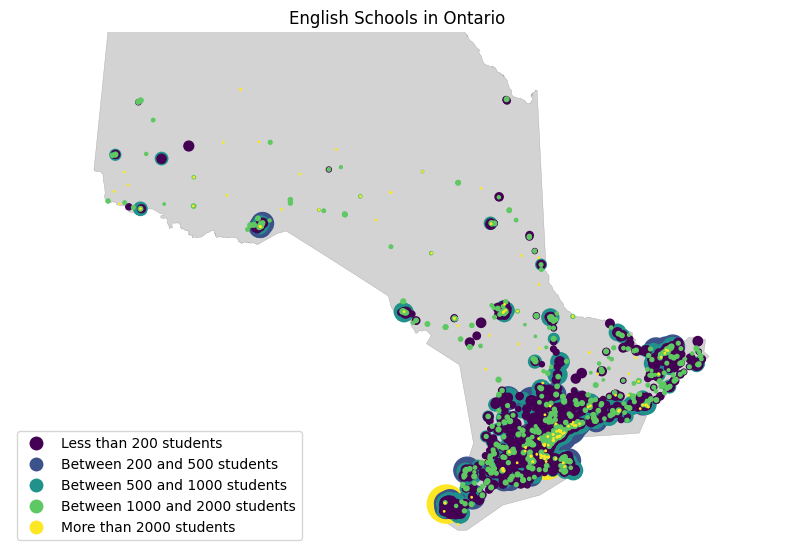

In [3]:
ontario = gpd.read_file('Ontario.geojson')
schools_ontario['hue'] = 0

for i in range(0, len(schools_ontario)):
  if schools_ontario['Enrolment'][i] > 0 and schools_ontario['Enrolment'][i] < 200:
     schools_ontario.loc[i,'hue'] = TolRainbow[8][0]
  elif schools_ontario['Enrolment'][i] >= 200 and schools_ontario['Enrolment'][i] < 500:
     schools_ontario.loc[i,'hue'] = TolRainbow[8][1]
  elif schools_ontario['Enrolment'][i] >= 500 and schools_ontario['Enrolment'][i] < 1000:
     schools_ontario.loc[i,'hue'] = TolRainbow[8][2]
  elif schools_ontario['Enrolment'][i] >= 1000 and schools_ontario['Enrolment'][i] < 2000:
     schools_ontario.loc[i,'hue'] = TolRainbow[8][3]
  else:
     schools_ontario.loc[i,'hue'] = TolRainbow[8][4]

french_schools_ontario = schools_ontario.loc[schools_ontario['School Language'] == 'French']
english_schools_ontario = schools_ontario.loc[schools_ontario['School Language'] == 'English']

ontario_schools = gpd.GeoDataFrame(schools_ontario, geometry = gpd.points_from_xy(schools_ontario['Longitude'], schools_ontario['Latitude']))
ontario_map = gplt.polyplot(ontario, projection=gcrs.AlbersEqualArea(),edgecolor='darkgrey', facecolor='lightgrey',linewidth=.3,figsize=(10,10))
gplt.pointplot(ontario_schools, projection=gcrs.AlbersEqualArea(), scale = schools_ontario['Enrolment'], limits = (1,30), hue = schools_ontario['hue'] , legend = True, legend_labels = ['Less than 200 students', 'Between 200 and 500 students', 'Between 500 and 1000 students', 'Between 1000 and 2000 students', 'More than 2000 students'], ax = ontario_map)
ontario_map.set_title('Schools in Ontario')
ontario_map.set_xlabel('Longitude')
ontario_map.set_ylabel('Latitude')

french_ontario_schools = gpd.GeoDataFrame(french_schools_ontario, geometry = gpd.points_from_xy(french_schools_ontario['Longitude'], french_schools_ontario['Latitude']))
french_ontario_map = gplt.polyplot(ontario, projection=gcrs.AlbersEqualArea(),edgecolor='darkgrey', facecolor='lightgrey',linewidth=.3,figsize=(10,10))
gplt.pointplot(french_ontario_schools, projection=gcrs.AlbersEqualArea(), scale = french_schools_ontario['Enrolment'], limits = (1,30), hue = french_schools_ontario['hue'] , legend = True, legend_labels = ['Less than 200 students', 'Between 200 and 500 students', 'Between 500 and 1000 students', 'Between 1000 and 2000 students'], ax = french_ontario_map)
french_ontario_map.set_title('French Schools in Ontario')
french_ontario_map.set_xlabel('Longitude')
french_ontario_map.set_ylabel('Latitude')

english_ontario_schools = gpd.GeoDataFrame(english_schools_ontario, geometry = gpd.points_from_xy(english_schools_ontario['Longitude'], english_schools_ontario['Latitude']))
english_ontario_map = gplt.polyplot(ontario, projection=gcrs.AlbersEqualArea(),edgecolor='darkgrey', facecolor='lightgrey',linewidth=.3,figsize=(10,10))
gplt.pointplot(english_ontario_schools, projection=gcrs.AlbersEqualArea(), scale = english_schools_ontario['Enrolment'], limits = (1,30), hue = english_schools_ontario['hue'] , legend = True, legend_labels = ['Less than 200 students', 'Between 200 and 500 students', 'Between 500 and 1000 students', 'Between 1000 and 2000 students', 'More than 2000 students'], ax = english_ontario_map)
english_ontario_map.set_title('English Schools in Ontario')
english_ontario_map.set_xlabel('Longitude')
english_ontario_map.set_ylabel('Latitude')

Making some graphs with the DataFrame.

In [4]:
#charts'
enrolment = schools_ontario['Enrolment']
not_english_first = schools_ontario['Percentage of Students Whose First Language Is Not English']
not_french_first = schools_ontario['Percentage of Students Whose First Language Is Not French']
not_english_newcomers = schools_ontario['Percentage of Students Who Are New to Canada from a Non-English Speaking Country']
not_french_newcomers = schools_ontario['Percentage of Students Who Are New to Canada from a Non-French Speaking Country']
special_needs = schools_ontario['Percentage of Students Receiving Special Education Services']
gifted_students = schools_ontario['Percentage of Students Identified as Gifted']


not_French_countries_fig = figure(title = 'Number of newcomers who are Not from French Speaking countries', x_axis_label = 'Number of students', y_axis_label = 'Percentage(%)')
not_English_countries_fig = figure(title = 'Number of newcomers who are Not from English Speaking countries', x_axis_label = 'Number of students', y_axis_label = 'Percentage(%)')
not_english_newcomers_fig = figure(title = 'Number of newcomers who are Not from English Speaking countries', x_axis_label = 'Number of students', y_axis_label = 'Percentage(%)')
not_french_newcomers_fig = figure(title = 'Number of newcomers who are Not from French Speaking countries', x_axis_label = 'Number of students', y_axis_label = 'Percentage(%)')
special_needs_fig = figure(title = 'Number of students who are receiving special education services', x_axis_label = 'Number of students', y_axis_label = 'Percentage(%)')
gifted_students_fig = figure(title = 'Number of students who are Gifted', x_axis_label = 'Number of students', y_axis_label = 'Percentage(%)')

not_French_countries_fig.scatter(enrolment, not_french_first)
not_English_countries_fig.scatter(enrolment, not_english_first)
not_english_newcomers_fig.scatter(enrolment, not_english_newcomers)
not_french_newcomers_fig.scatter(enrolment, not_french_newcomers)
special_needs_fig.scatter(enrolment, special_needs)
gifted_students_fig.scatter(enrolment, gifted_students)

grid = gridplot([[not_French_countries_fig, not_English_countries_fig],[not_french_newcomers_fig, not_english_newcomers_fig],[special_needs_fig,gifted_students_fig]])
show(grid)

K-Means configuration and Elbow Method to determine the optimizes number of centroids.

In [25]:
num_cols = ['Enrolment','Latitude','Longitude','Percentage of Students Whose First Language Is Not English','Percentage of Students Whose First Language Is Not French','Percentage of Students Who Are New to Canada from a Non-English Speaking Country','Percentage of Students Who Are New to Canada from a Non-French Speaking Country','Percentage of Students Receiving Special Education Services','Percentage of Students Identified as Gifted','Percentage of Grade 3 Students Achieving the Provincial Standard in Reading','Percentage of Grade 3 Students Achieving the Provincial Standard in Writing','Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics','Percentage of Grade 6 Students Achieving the Provincial Standard in Reading','Percentage of Grade 6 Students Achieving the Provincial Standard in Writing','Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics','Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics','Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics','Percentage of School-Aged Children Who Live in Low-Income Households','Percentage of Students Whose Parents Have No Degree, Diploma or Certificate']
X = schools_ontario[num_cols]
kmeans = KMeans(random_state = 50 ,n_init = 50)
X = X.dropna()
kmeans.fit(X)
kmeans.predict(X)
kmeans.cluster_centers_
kmeans.inertia_
preprocessor = make_column_transformer((StandardScaler(), num_cols))
kmeans = make_pipeline(preprocessor, KMeans(random_state=50))
kmeans.fit(schools_ontario)
kmeans.named_steps['kmeans'].inertia_

#elbow method
inertias = []
k_vals = range(1,20)
for k in k_vals:
  kmeans.set_params(kmeans__n_clusters = k)
  kmeans.fit(schools_ontario)
  inertias.append(kmeans.named_steps['kmeans'].inertia_)

inertias_plot = figure(title = 'Sleep data KMeans Elbow Method', x_axis_label = 'k Values', y_axis_label = 'Inertia')
inertias_plot.line(list(k_vals), inertias)
inertias_plot.scatter(list(k_vals), inertias)
show(inertias_plot)

#Using elbow method to adjut the number of segments
optimal_k = 8
kmeans.set_params(kmeans__n_clusters = optimal_k)
kmeans.fit(schools_ontario)
print("inertia \t\t ", kmeans.named_steps['kmeans'].inertia_)
schools_ontario['category'] = kmeans.fit_predict(schools_ontario)
segments = schools_ontario['category'].unique()
segments.sort()

#Charts
newcomers_NF_student_NF_fig = figure(title = 'Non Native French Speakers percentage vs Not from French speaking countries percentage', x_axis_label = 'Non Native French Speakers percentage (%)', y_axis_label = 'Not from French speaking countries percentage')
newcomers_NE_student_NE_fig = figure(title = 'Non Native English Speakers percentage vs Not from English speaking countries percentage', x_axis_label = 'Non Native English Speakers percentage (%)', y_axis_label = 'Not from English speaking countries percentage')
newcomer_NF_g3r_fig = figure(title = 'Non Native French Speakers percentage vs Grade 3 Reading percentage', x_axis_label = 'Non Native French Speakers percentage (%)', y_axis_label = 'Grade 3 Reading percentage (%)')

newcomers_not_english = schools_ontario['Percentage of Students Who Are New to Canada from a Non-English Speaking Country']
newcomers_not_french = schools_ontario['Percentage of Students Who Are New to Canada from a Non-French Speaking Country']
english_first = schools_ontario['Percentage of Students Whose First Language Is Not English']
french_first = schools_ontario['Percentage of Students Whose First Language Is Not French']
special_needs = schools_ontario['Percentage of Students Receiving Special Education Services']
gifted_students = schools_ontario['Percentage of Students Identified as Gifted']
grade_3_reading = schools_ontario['Percentage of Grade 3 Students Achieving the Provincial Standard in Reading']
palette = TolRainbow
for i, segment in enumerate(segments):
  indices = schools_ontario['category'] == segment
  newcomers_NF_student_NF_fig.scatter(newcomers_not_french[indices], french_first[indices], color = palette[23][i], legend_label = 'Segment ' + str(segment))
  newcomers_NE_student_NE_fig.scatter(newcomers_not_english[indices], english_first[indices], color = palette[23][i], legend_label = 'Segment ' + str(segment))
  newcomer_NF_g3r_fig.scatter(newcomers_not_french[indices], grade_3_reading[indices], color = palette[23][i], legend_label = 'Segment ' + str(segment))

grid_2 = gridplot([[newcomers_NF_student_NF_fig, newcomers_NE_student_NE_fig],[newcomer_NF_g3r_fig]])
show(grid_2)

      Enrolment  Latitude  Longitude  \
0         210.0  46.53477   -84.3077   
1         200.0  46.50593   -84.2873   
2         150.0  46.52455   -84.2980   
3         175.0  46.18454   -82.9576   
4         470.0  46.52447   -84.3107   
...         ...       ...        ...   
4883      665.0  43.89840   -79.2746   
4884      515.0  43.77990   -79.5828   
4885      490.0  43.78062   -79.5956   
4886      260.0  43.82495   -79.4135   
4887      405.0  43.80399   -79.4368   

      Percentage of Students Whose First Language Is Not English  \
0                                                   0.0            
1                                                   5.0            
2                                                  10.0            
3                                                   0.0            
4                                                  10.0            
...                                                 ...            
4883                                       

inertia 		  40459.66319747467


School recommendations based on kmeans clustering.

In [42]:
schools_ontario['City'] = schools_ontario['City'].str.capitalize()

def input_city():
  return input('Enter the name of a city in Ontario: ')

def input_level():
  return input('Enter the level of the school: ')

def input_language():
  return input('Enter the language of the school: ')

def school_recommendation(ontario_df,city,level,language):
  ontario_schools_fitltered = ontario_df[ontario_df['City'] == city]
  ontario_schools_fitltered = ontario_schools_fitltered[ontario_schools_fitltered['School Level'] == level]
  ontario_schools_fitltered = ontario_schools_fitltered[ontario_schools_fitltered['School Language'] == language]
  if ontario_schools_fitltered.empty:
    return f'There is no {language_input} {level_input} school in {city_input}.'
  num_cols = ['Enrolment','Latitude','Longitude','Percentage of Students Whose First Language Is Not English','Percentage of Students Whose First Language Is Not French','Percentage of Students Who Are New to Canada from a Non-English Speaking Country','Percentage of Students Who Are New to Canada from a Non-French Speaking Country','Percentage of Students Receiving Special Education Services','Percentage of Students Identified as Gifted','Percentage of Grade 3 Students Achieving the Provincial Standard in Reading','Percentage of Grade 3 Students Achieving the Provincial Standard in Writing','Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics','Percentage of Grade 6 Students Achieving the Provincial Standard in Reading','Percentage of Grade 6 Students Achieving the Provincial Standard in Writing','Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics','Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics','Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics','Percentage of School-Aged Children Who Live in Low-Income Households','Percentage of Students Whose Parents Have No Degree, Diploma or Certificate']
  X = schools_ontario[num_cols]
  kmeans = KMeans(n_clusters = 8, random_state = 50, n_init = 50)
  ontario_schools_fitltered['cluster'] = kmeans.fit_predict(ontario_schools_fitltered[num_cols])
  closet_cluster = kmeans.predict(ontario_schools_fitltered[num_cols].iloc[0].values.reshape(1, -1))[0]
  schools_items = ontario_schools_fitltered[ontario_schools_fitltered['cluster'] == closet_cluster][:5]
  return schools_items[['School Name','City','School Level','School Language','cluster']]

city_input = input_city()
level_input = input_level()
language_input = input_language()

def main():
  try:
    results = school_recommendation(schools_ontario,city_input,level_input,language_input)
    print(results)
  except Exception as e:
    logging.error(f"An error occurred: {e}")
    raise

if __name__ == "__main__":
  main()

Enter the name of a city in Ontario: Pembroke
Enter the level of the school: Elementary
Enter the language of the school: English
                       School Name      City School Level School Language  \
2862  Bishop Smith Separate School  Pembroke   Elementary         English   

      cluster  
2862        2  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
